In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import seaborn as sns
from sklearn.metrics import mutual_info_score
from sklearn.utils import resample
from scipy.stats import chisquare
from sklearn.feature_selection import chi2, SelectKBest, f_classif, f_regression
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder
import matplotlib.pyplot as plt
from scipy.stats import chi2
import scipy.stats as stats
from sklearn.feature_selection import mutual_info_classif
from sklearn import feature_selection

In [2]:
st_mat = pd.read_csv('/case/student-mat.csv')
#print first 10 examples
st_mat.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [4]:
num_cols = [col for t, col in zip(st_mat.dtypes, st_mat.columns) if t=='int64']
num_cols

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [50]:
X = st_mat2.loc[:,'school':'G3']
X = X.select_dtypes(include=np.int64)
X.head(5)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


### Pearson Correlation

(-0.16157943813834016, 0.0012714385457178665)

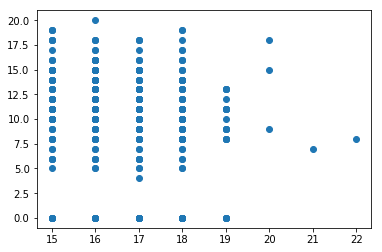

In [5]:
# Example
X = st_mat['age']
Y = st_mat['G3']

plt.plot(X,Y, "o")

# returns correlation and p-value
stats.pearsonr(X,Y)

(0.15245693890425877, 0.0023799726323398573)

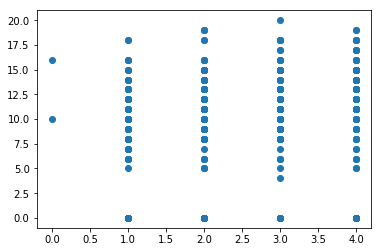

In [6]:
X = st_mat['Fedu']
Y = st_mat['G3']

plt.plot(X,Y, "o")

# returns correlation and p-value
stats.pearsonr(X,Y)

(-0.117142052816149, 0.019869825965061566)

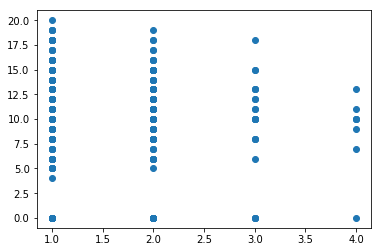

In [7]:
X = st_mat['traveltime']
Y = st_mat['G3']

plt.plot(X,Y, "o")

# returns correlation and p-value
stats.pearsonr(X,Y)

(0.09781968965319622, 0.05206115462063121)

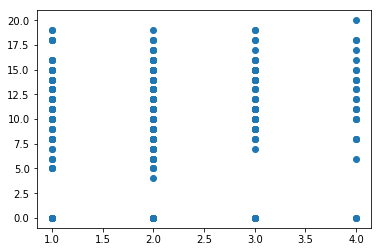

In [8]:
X = st_mat['studytime']
Y = st_mat['G3']

plt.plot(X,Y, "o")

# returns correlation and p-value
stats.pearsonr(X,Y)

(-0.36041494046165, 1.465662824788183e-13)

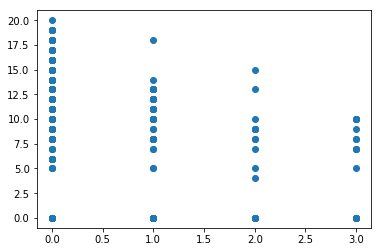

In [9]:
X = st_mat['failures']
Y = st_mat['G3']

plt.plot(X,Y, "o")

# returns correlation and p-value
stats.pearsonr(X,Y)

(0.011307240308313017, 0.8227402473530563)

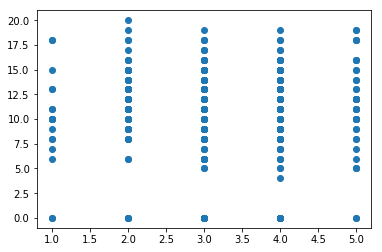

In [10]:
X = st_mat['freetime']
Y = st_mat['G3']

plt.plot(X,Y, "o")

# returns correlation and p-value
stats.pearsonr(X,Y)

(-0.13279147350332907, 0.008229000450140671)

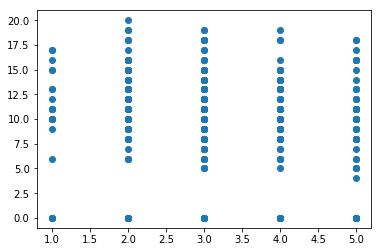

In [11]:
X = st_mat['goout']
Y = st_mat['G3']

plt.plot(X,Y, "o")

# returns correlation and p-value
stats.pearsonr(X,Y)

(-0.06133460487712129, 0.2238770101151662)

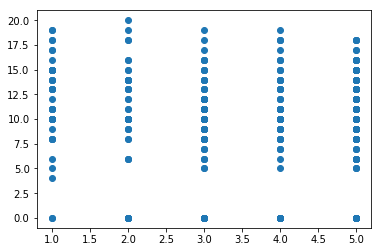

In [12]:
X = st_mat['health']
Y = st_mat['G3']

plt.plot(X,Y, "o")

# returns correlation and p-value
stats.pearsonr(X,Y)

### Spearman Rank Correlation

SpearmanrResult(correlation=-0.17343754686136573, pvalue=0.0005354721839153026)

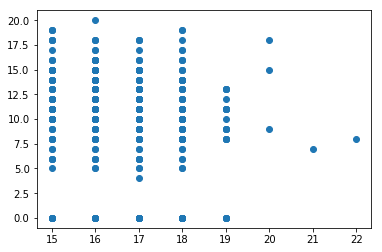

In [19]:
# Example
X = st_mat['age']
Y = st_mat['G3']

plt.plot(X,Y, "o")
stats.spearmanr(X,Y)

SpearmanrResult(correlation=0.17004900082627797, pvalue=0.0006895636032614371)

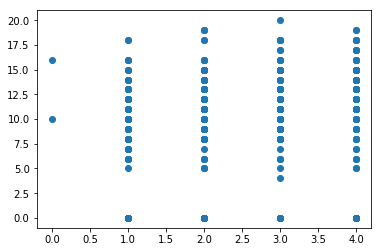

In [15]:
X = st_mat['Fedu']
Y = st_mat['G3']

plt.plot(X,Y, "o")
stats.spearmanr(X,Y)

SpearmanrResult(correlation=-0.12053038660352437, pvalue=0.016545913756784082)

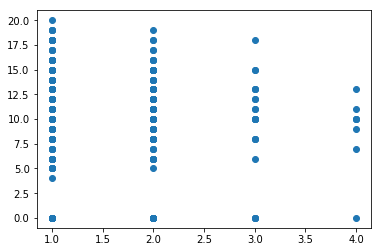

In [16]:
X = st_mat['traveltime']
Y = st_mat['G3']

plt.plot(X,Y, "o")
stats.spearmanr(X,Y)

SpearmanrResult(correlation=0.10516968678133246, pvalue=0.036673582871214104)

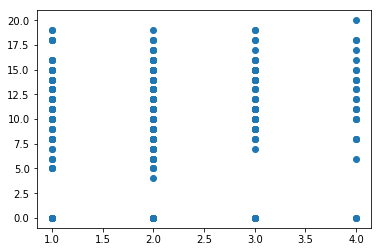

In [17]:
X = st_mat['studytime']
Y = st_mat['G3']

plt.plot(X,Y, "o")
stats.spearmanr(X,Y)

SpearmanrResult(correlation=-0.361223517700282, pvalue=1.2818799782347257e-13)

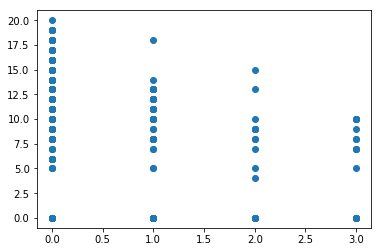

In [18]:
X = st_mat['failures']
Y = st_mat['G3']

plt.plot(X,Y, "o")
stats.spearmanr(X,Y)

SpearmanrResult(correlation=-0.004993740953811285, pvalue=0.9211901023094021)

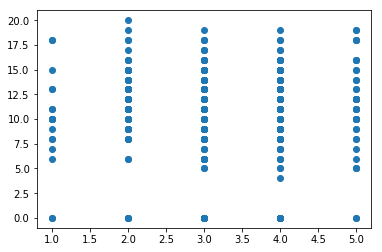

In [51]:
X = st_mat['freetime']
Y = st_mat['G3']

plt.plot(X,Y, "o")
stats.spearmanr(X,Y)

SpearmanrResult(correlation=-0.1661187496045088, pvalue=0.0009192641404671132)

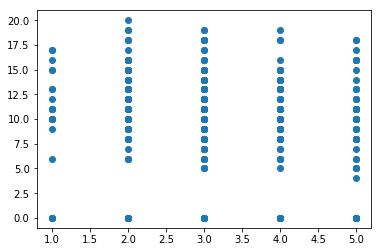

In [52]:
X = st_mat['goout']
Y = st_mat['G3']


plt.plot(X,Y, "o")
stats.spearmanr(X,Y)

SpearmanrResult(correlation=-0.047789506549450154, pvalue=0.34347118660157205)

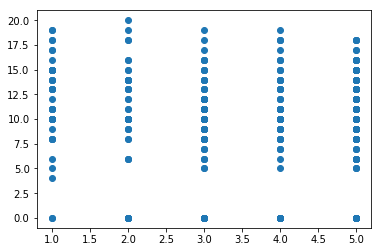

In [53]:
X = st_mat['health']
Y = st_mat['G3']

plt.plot(X,Y, "o")
stats.spearmanr(X,Y)

SpearmanrResult(correlation=0.017730669122425113, pvalue=0.7253626110680622)

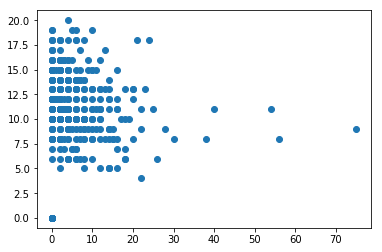

In [54]:
X = st_mat['absences']
Y = st_mat['G3']

plt.plot(X,Y, "o")
stats.spearmanr(X,Y)

# NUMERIC INPUT, CATEGORICAL OUTPUT

### Kendall Rank Correlation

In [22]:
st_mat2 = pd.read_csv('/case/student-mat.csv')
#print first 10 examples
st_mat2['FinalGrade'] = 'na'
st_mat2.loc[(st_mat2.G3 >= 16) & (st_mat2.G3 <= 20), 'FinalGrade'] = 'Excellent'
st_mat2.loc[(st_mat2.G3 >= 11) & (st_mat2.G3 <= 15), 'FinalGrade'] = 'Good' 
st_mat2.loc[(st_mat2.G3 >= 6) & (st_mat2.G3 <= 10), 'FinalGrade'] = 'Poor' 
st_mat2.loc[(st_mat2.G3 >= 0) & (st_mat2.G3 <= 5), 'FinalGrade'] = 'Failure' 
st_mat2.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,FinalGrade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Poor
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Good
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Poor


KendalltauResult(correlation=0.05405149869989189, pvalue=0.20255006479327242)

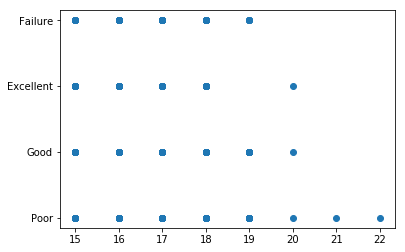

In [26]:
X = st_mat2['age']
Y = st_mat2['FinalGrade']
plt.plot(X,Y, "o")
stats.kendalltau(X,Y)

C:\Users\burak\Anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


KendalltauResult(correlation=-0.09093198686506986, pvalue=0.03494539566414131)

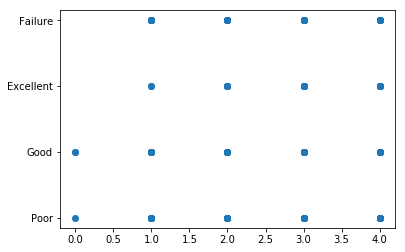

In [27]:
X = st_mat2['Medu']
Y = st_mat2['FinalGrade']
plt.plot(X,Y, "o")
stats.kendalltau(X,Y)

KendalltauResult(correlation=-0.09804279943721722, pvalue=0.022525249527960752)

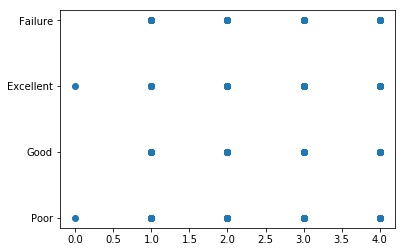

In [31]:
X = st_mat2['Fedu']
Y = st_mat2['FinalGrade']
plt.plot(X,Y, "o")
stats.kendalltau(X,Y)

KendalltauResult(correlation=0.09059571140238841, pvalue=0.04722362433810896)

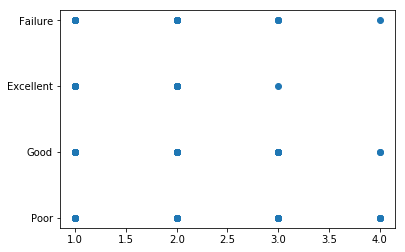

In [32]:
X = st_mat2['traveltime']
Y = st_mat2['FinalGrade']
plt.plot(X,Y, "o")
stats.kendalltau(X,Y)

KendalltauResult(correlation=-0.033040054980390136, pvalue=0.4537492091388482)

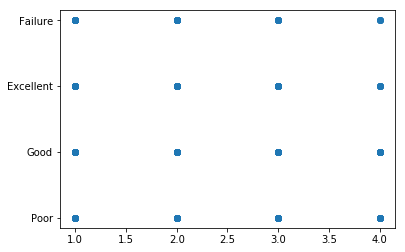

In [33]:
X = st_mat2['studytime']
Y = st_mat2['FinalGrade']
plt.plot(X,Y, "o")
stats.kendalltau(X,Y)

KendalltauResult(correlation=0.04393016680777229, pvalue=0.3369602701989448)

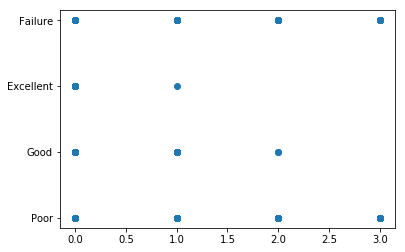

In [34]:
X = st_mat2['failures']
Y = st_mat2['FinalGrade']
plt.plot(X,Y, "o")
stats.kendalltau(X,Y)

KendalltauResult(correlation=-0.018288171661616393, pvalue=0.6720549301214)

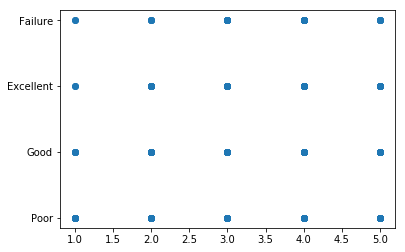

In [35]:
X = st_mat2['freetime']
Y = st_mat2['FinalGrade']
plt.plot(X,Y, "o")
stats.kendalltau(X,Y)

KendalltauResult(correlation=0.06571236862175547, pvalue=0.1243289185130992)

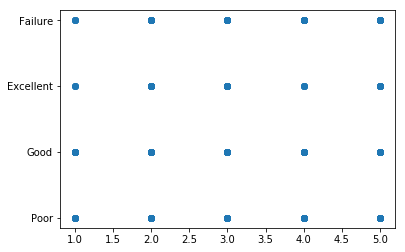

In [36]:
X = st_mat2['goout']
Y = st_mat2['FinalGrade']
plt.plot(X,Y, "o")
stats.kendalltau(X,Y)

KendalltauResult(correlation=0.01937142497981609, pvalue=0.6496918593695608)

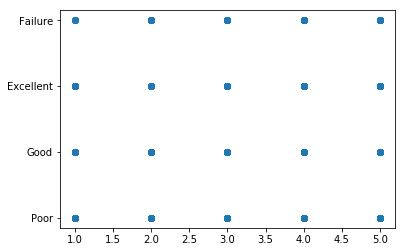

In [41]:
X = st_mat2['health']
Y = st_mat2['FinalGrade']
plt.plot(X,Y, "o")
stats.kendalltau(X,Y)

KendalltauResult(correlation=0.2180145191585789, pvalue=9.762937437975207e-08)

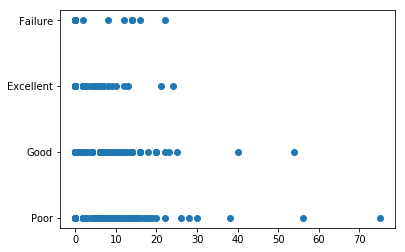

In [42]:
X = st_mat2['absences']
Y = st_mat2['FinalGrade']
plt.plot(X,Y, "o")
stats.kendalltau(X,Y)

# CATEGORICAL INPUT, CATEGORICAL OUTPUT

### Chi Square

In [43]:
le = LabelEncoder()
X = st_mat2.loc[:,'school':'G3']
X = X.select_dtypes(include=np.object) # select string columns
X = X.apply(LabelEncoder().fit_transform)
y = le.fit_transform(st_mat2.loc[:,'FinalGrade'])
chi2, pval=feature_selection.chi2(X, y)

In [44]:
sorted_idx = np.argsort(chi2)[::-1]
sorted_vals = np.sort(chi2)[::-1]

d = {"features":X.columns[sorted_idx], "values":sorted_vals, "p-values":pval[sorted_idx]}
df = pd.DataFrame(d)
df

,features,values,p-values
0,schoolsup,13.743465,0.003276
1,paid,8.081518,0.044357
2,romantic,6.415620,0.093050
3,Mjob,6.009885,0.111130
4,reason,5.957357,0.113703
5,famsize,2.712811,0.438055
6,school,2.708666,0.438757
7,sex,2.033801,0.565421
8,Fjob,1.529308,0.675523
9,address,1.060632,0.786585
